# SECTION 01. 지표로 데이터 탐색하기

## 1. 일변량 비시각화 탐색하기

### 1) 요약통계량 확인하기

In [1]:
# 판다스 불러오기
import pandas as pd

# 데이터 읽어오기
df=pd.read_csv("Clean_Dataset.csv")

# 지정 인덱스인 첫번째 칼럼 삭제하기
df.drop([df.columns[0]], axis=1, inplace=True)

In [2]:
# 수치형 데이터의 요약통계량 확인하기
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [3]:
# 전체 칼럼의 요약통계량 확인하기
df.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


### 2) 빈도표 확인하기

In [4]:
# airline, source_city, destination_city의 빈도표 확인하기
print(df["airline"].value_counts())
print(df["source_city"].value_counts())
print(df["destination_city"].value_counts())

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64


## 2. 다변량 비시각화 탐색하기

### 1) 상관계수 확인하기

In [5]:
# 데이터의 상관계수 확인하기
df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_13012\658404157.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [6]:
# class를 Economy로 한정하여 새로운 데이터프레임 df_eco 생성하기
df_eco=df[(df['class']=='Economy')]

# df_eco의 상관계수 확인하기
df_eco.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_13012\910836893.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_eco.corr()


,duration,days_left,price
duration,1.000000,-0.042537,0.288379
days_left,-0.042537,1.000000,-0.559551
price,0.288379,-0.559551,1.000000


### 2) 교차표 확인하기

In [7]:
# source_city와 departure_time 두 범주형 변수의 변수간의 관계 확인하기
pd.crosstab(df['source_city'], df['departure_time'])

departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
source_city,,,,,,
Bangalore,5183,13611,14243,457,12323,6244
Chennai,5807,9319,5402,72,10550,7550
Delhi,11234,12248,16790,357,13679,7035
Hyderabad,7221,8524,5991,38,9923,9109
Kolkata,7863,8133,9594,114,12065,8578
Mumbai,10486,14955,13082,268,12606,9499


# SECTION 02. 시각화로 데이터 탐색하기

##  1. 일변량 시각화 탐색(Maplotlib)하기

### 1) 선 그래프 (line plot)

In [8]:
# days_left별 평균 데이터 만들기
days_left=df.groupby('days_left').mean()
days_left.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13012\1832254401.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  days_left=df.groupby('days_left').mean()


,duration,price
days_left,,
1,14.250228,21591.867151
2,14.111080,30211.299801
3,14.287476,28976.083569
4,13.742667,25730.905653
5,12.921970,26679.773368


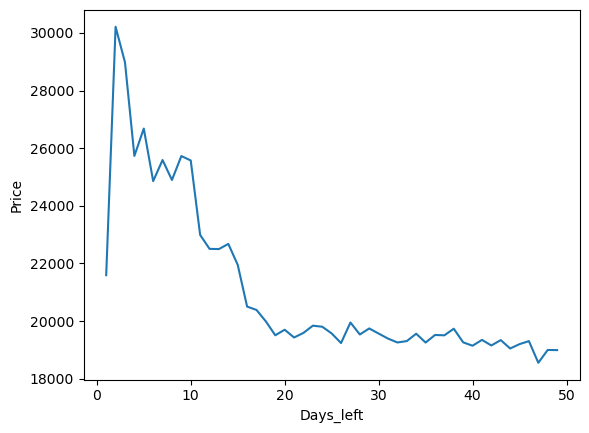

In [9]:
# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt

# 시각화 영역(figure) 지정하기
plt.figure()

# days_left의 price 데이터로 선 그래프 그리기
plt.plot(days_left['price'])

# X축 이름 지정하기
plt.xlabel("Days_left")

# Y축 이름 지정하기
plt.ylabel("Price")

# 시각화 표기하기
plt.show()

### 2) 막대 그래프(bar plot)

In [10]:
# airline별 평균 데이터 만들기
airline=df.groupby(['airline']).mean()
airline

C:\Users\User\AppData\Local\Temp\ipykernel_13012\3413448327.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  airline=df.groupby(['airline']).mean()


,duration,days_left,price
airline,,,
AirAsia,8.941714,27.735184,4091.072742
Air_India,15.504235,25.497466,23507.019112
GO_FIRST,8.755380,27.430415,5652.007595
Indigo,5.795197,26.264309,5324.216303
SpiceJet,12.579767,24.122850,6179.278881
Vistara,13.326634,25.894532,30396.536302


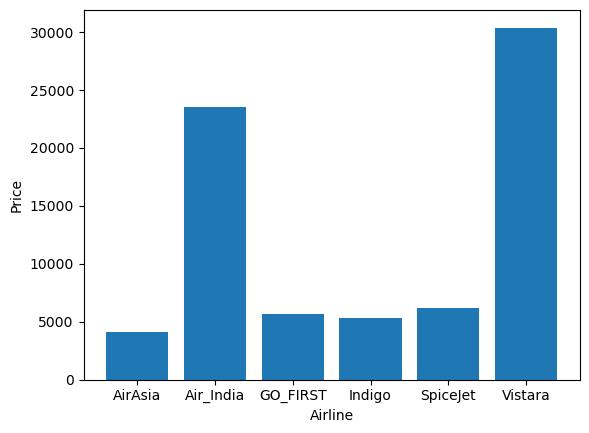

In [11]:
# 인덱스를 리스트로 만들기
label = airline.index

plt.figure()

# 인덱스를 X, 평균가격을 Y로 하는 막대 그래프 그리기
plt.bar(label, airline['price'])
plt.xlabel("Airline")
plt.ylabel("Price")
plt.show()

### 3) 파이 그래프(pie plot)

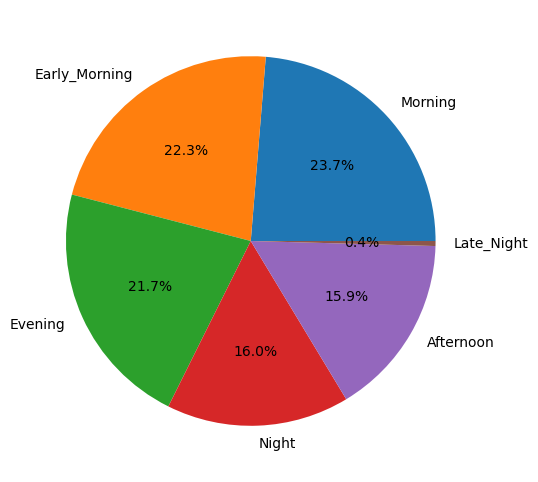

In [12]:
# departure_time 빈도표 데이터 만들기
departure_time=df['departure_time'].value_counts()

plt.figure(figsize=(10,6))

# departure_time 빈도표 데이터로 파이 그래프 그리기
plt.pie(departure_time, labels=departure_time.index, autopct='%.1f%%')
plt.show()

### 4) 도수분포표(histogram)

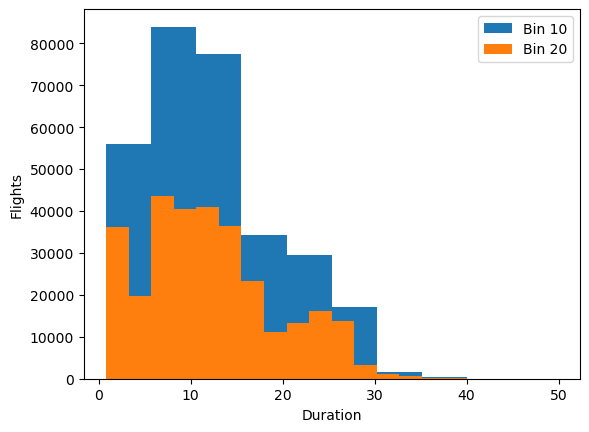

In [13]:
plt.figure()

# duration을 20개 구간으로 나눠서 히스토그램 그리기
plt.hist(df['duration'], bins=10)

# duration을 10개 구간으로 나눠서 히스토그램 그리기
plt.hist(df['duration'], bins=20)
plt.xlabel("Duration")
plt.ylabel("Flights")

# 동시에 2개의 그래프를 하나의 시각화 영역에 그려 범례 지정하기
plt.legend(("Bin 10", "Bin 20"))
plt.show()

### 5) 상자 그래프(box plot)

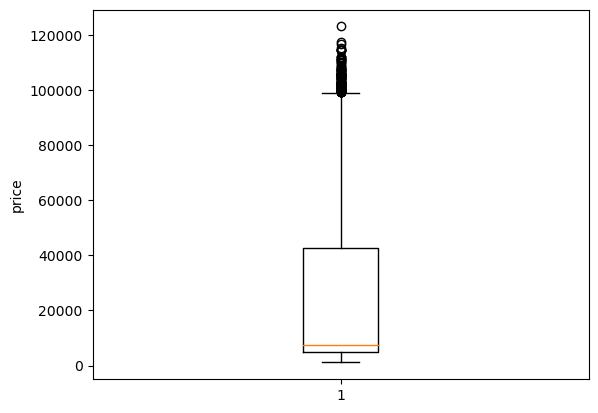

In [14]:
plt.figure()

# Price 칼럼에 대한 상자 그래프 그리기
plt.boxplot(list(df['price']))
plt.ylabel("price")
plt.show()

<Axes: title={'center': 'price'}, xlabel='departure_time'>

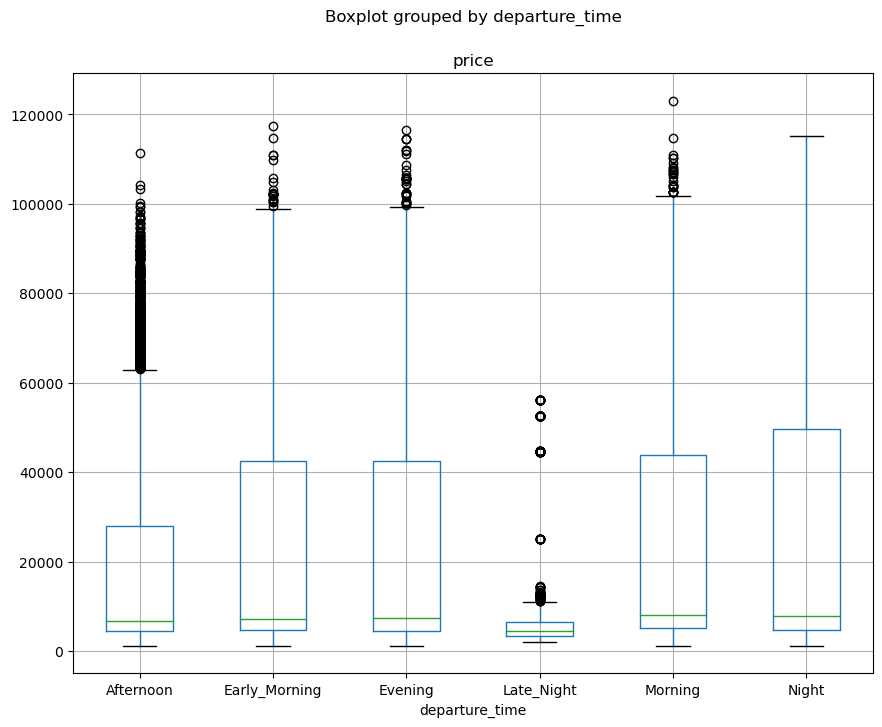

In [15]:
# departure_time별로 price에 대한 상자 그래프 그리기
df.boxplot(by="departure_time", column="price", figsize=(10,8))

## 2. 다변량 시각화 탐색하기

### 1) 산점도(scatter plot)

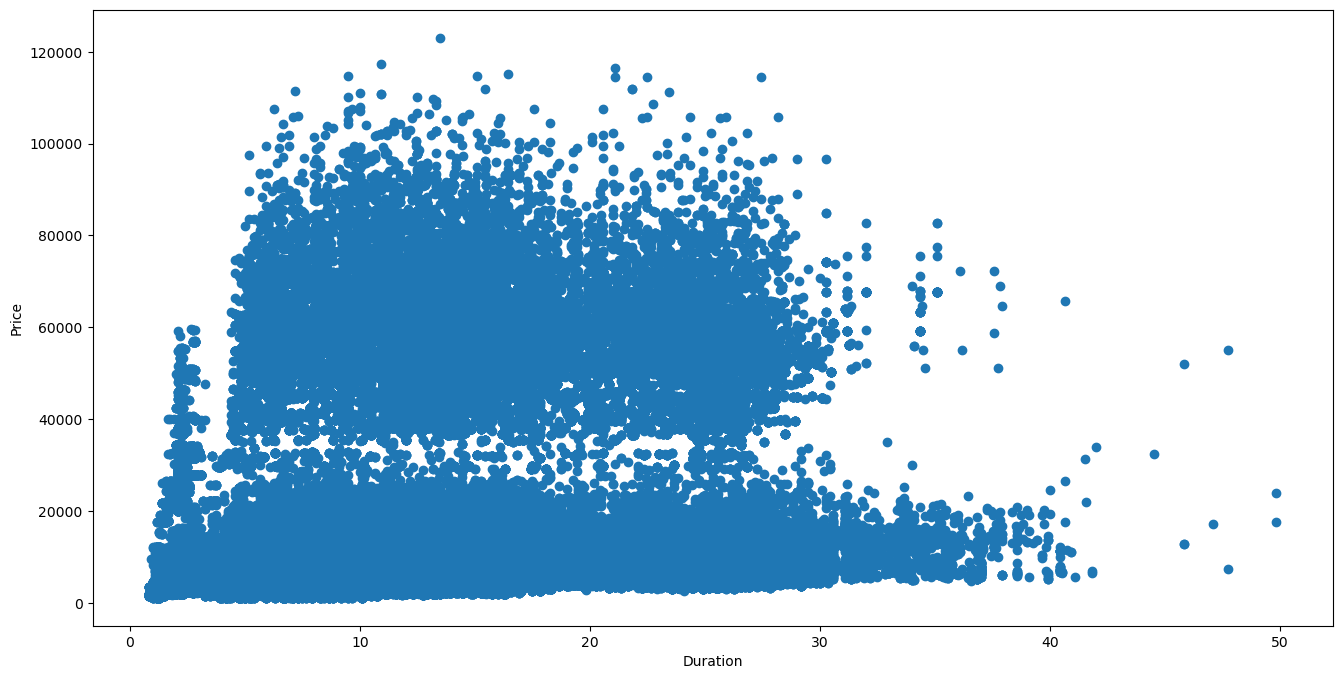

In [16]:
plt.figure(figsize=(16,8))

# price와 dration간의 산점도 그리기
plt.scatter(y=df["price"], x=df["duration"])
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

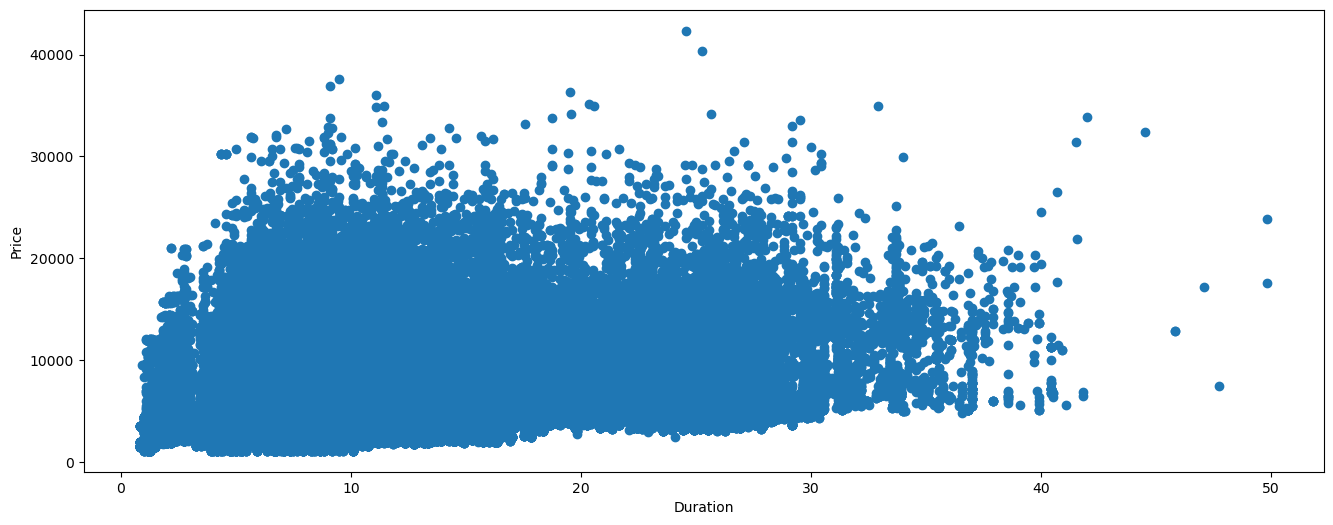

In [17]:
plt.figure(figsize=(16,6))

# "Economy" Class에 대한 price와 duration간의 산점도 그리기
plt.scatter(y=df_eco["price"], x=df_eco["duration"])
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

### 2) 히트맵(heatmap)

C:\Users\User\AppData\Local\Temp\ipykernel_13012\3591141920.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heat=df_eco.corr()


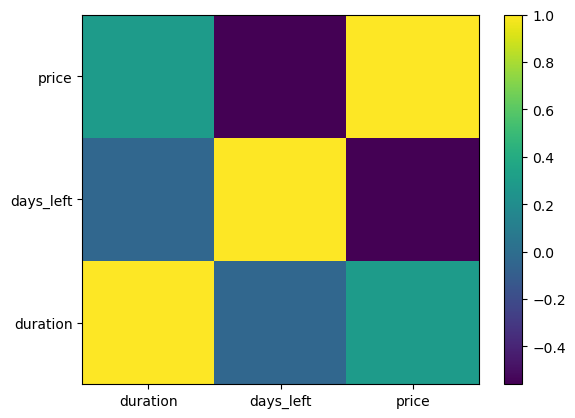

In [18]:
# numpy 불러오기
import numpy as np

# 상관계수 데이터 만들기
heat=df_eco.corr()

# 상관계수로 heatmap그리기
plt.pcolor(heat)

# x축 항목 정보 표기하기
plt.xticks(np.arange(0.5, len(heat.columns), 1), heat.columns)

# y축 항목 정보 표기하기
plt.yticks(np.arange(0.5, len(heat.index), 1), heat.index)

# 히트맵 확인을 위한 컬러바 표기하기
plt.colorbar()
plt.show()

## 3. maplotlib 활용하기

## 4. seaborn시각화 라이브러리 활용하기

### 1) 범주형 산점도(categorical plot)

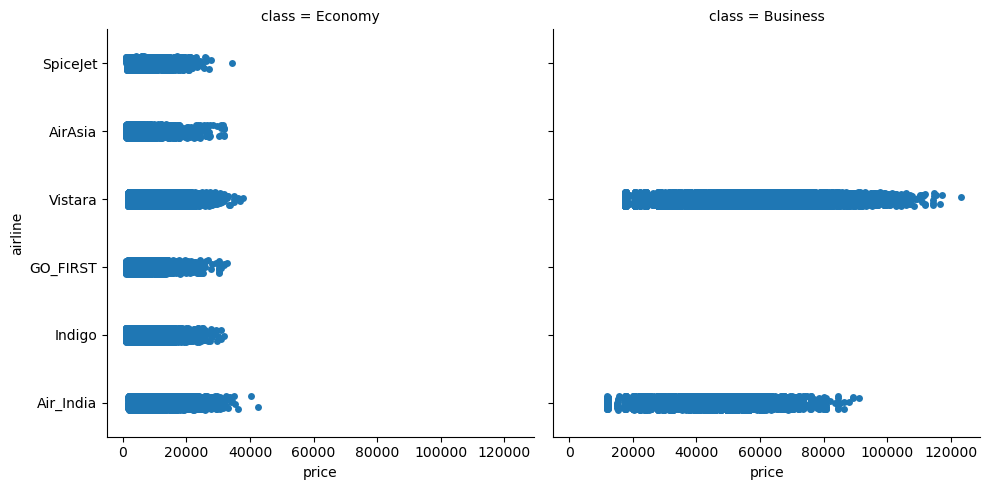

In [19]:
# seaborn이 기본 설치 되어있지 않은 작업 환경에서는 아래 줄의 #을 삭제 후 seaborn설치
#%pip install seaborn

# seaborn 불러오기
import seaborn as sns

# airline별 price를 class로 구분하여 시각화 하기
sns.catplot(y="airline", x="price", col='class', data=df)

### 2) 선형회귀 모델그래프 (linear model plot)

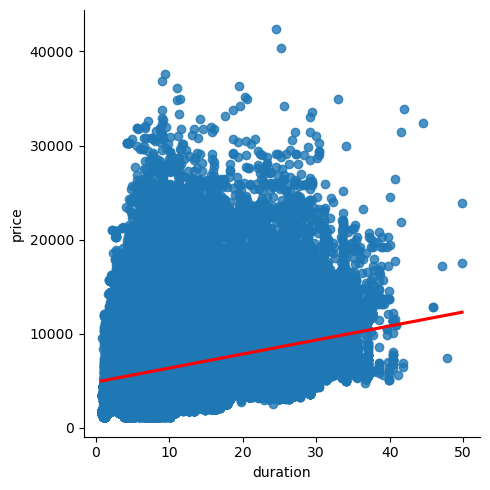

In [20]:
# duration과 price의 회귀선을 빨간색으로 표시해서 시각화 하기
sns.lmplot(x='duration', y='price', data=df_eco, line_kws={'color': 'red'})

### 3) 빈도 그래프(count plot)

<Axes: xlabel='airline', ylabel='count'>

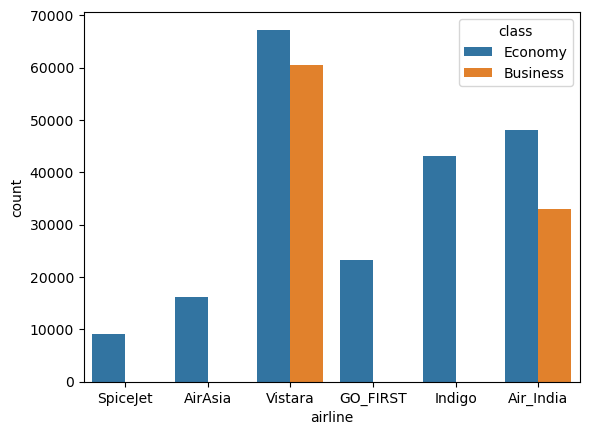

In [21]:
# 항공권 데이터의 빈도를 airline으로 구분하여 class별로 시각화 하기
sns.countplot(x="airline", hue="class", data=df)

### 4) 조인트 그래프(joint plot)

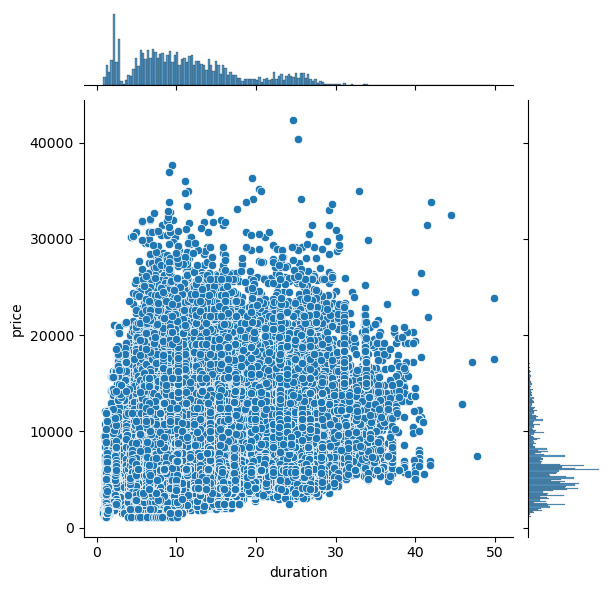

In [22]:
# price와 duration간의 관계를 joint plot으로 시각화 하기
sns.jointplot(y="price", x="duration", data=df_eco)

### 5) 히트맵(heatmap)

C:\Users\User\AppData\Local\Temp\ipykernel_13012\953134114.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_eco.corr())


<Axes: >

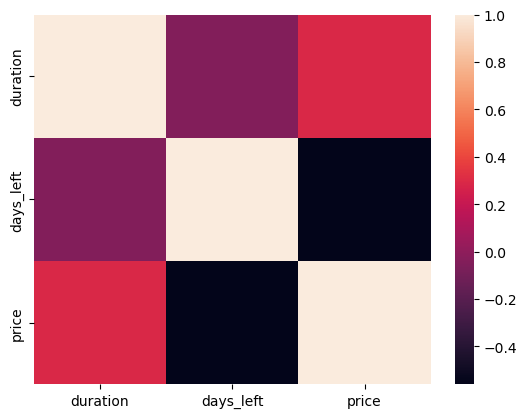

In [23]:
# 상관계수로 heatmap그리기
sns.heatmap(df_eco.corr())

### [확인문제] 정답 및 해설

##### 문제 02. 정답

C:\Users\User\AppData\Local\Temp\ipykernel_13012\520374687.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_eco.corr())


<Axes: >

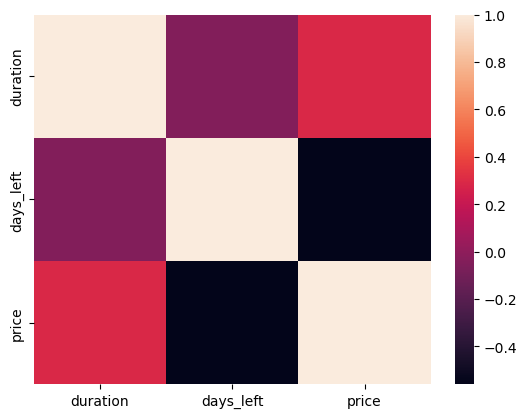

In [24]:
df_eco=df[(df['class']=='Economy')]
plt.figure()
sns.heatmap(df_eco.corr())